In [21]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy 
import cv2
from keras import *
from sklearn.model_selection import train_test_split
from os import listdir
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# to unzip the dataset file 
import zipfile as zf
files = zf.ZipFile('C:/Users/Anjali Priyadarshi/Downloads/archive.zip', 'r')
files.extractall('Alzheimer28_data')
files.close()

In [3]:
directory_root = "Alzheimer28_data"
default_image_size = tuple((128, 128))

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
        

In [5]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Error : name 'listdir' is not defined


In [6]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

In [7]:
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import LeakyReLU

In [8]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow import keras

In [17]:
labels = numpy.full((200,1),1)
label = numpy.full((200,1),2)
lab = numpy.concatenate((labels,label),axis=0)

In [18]:
np_image_list = numpy.array(image_list, dtype=numpy.float16) / 225.0

In [25]:
import os
from sklearn.preprocessing import LabelBinarizer

# Point to the specific folder (train or test)
data_path = "Alzheimer28_data/Dataset/train"

image_paths = []
label_list = []

for label in os.listdir(data_path):
    label_dir = os.path.join(data_path, label)
    if os.path.isdir(label_dir):
        for file in os.listdir(label_dir):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(label_dir, file))
                label_list.append(label)

# Check and confirm
print(f"✅ Found {len(image_paths)} images across {len(set(label_list))} classes.")
print(f"Classes: {set(label_list)}")

# Binarize labels only if we have data
if label_list:
    label_binarizer = LabelBinarizer()
    image_labels = label_binarizer.fit_transform(label_list)
    print("✅ Labels binarized successfully.")
else:
    print("❌ No labels found. Please check folder structure or image files.")


✅ Found 69148 images across 4 classes.
Classes: {'Non Demented', 'Mild Dementia', 'Very mild Dementia', 'Moderate Dementia'}
✅ Labels binarized successfully.


In [32]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

In [79]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

IMG_HEIGHT = 128
IMG_WIDTH = 128

# Adjust to match your training order
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

def predict_custom_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = img_to_array(image)
    # DO NOT rescale here if your model already does it via tf.keras.layers.Rescaling
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    predictions = model.predict(image)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Visualize
    plt.imshow(image[0].astype("uint8"))
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

train_dir = "Alzheimer28_data/Dataset/train"
test_dir = "Alzheimer28_data/Dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 69148 images belonging to 4 classes.
Found 17289 images belonging to 4 classes.


In [81]:
aug = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [82]:
import splitfolders
splitfolders.ratio('Alzheimer28_data/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 0 files [00:00, ? files/s]


In [83]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer28_data/Dataset/train",
    image_size=(128, 128),
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Alzheimer28_data/Dataset/test",
    image_size=(128, 128),
    batch_size=32
)


Found 69148 files belonging to 4 classes.
Found 17289 files belonging to 4 classes.


In [84]:
val_ds = train_ds.take(len(train_ds) // 10)
train_ds = train_ds.skip(len(train_ds) // 10)


In [85]:
import tensorflow as tf

# Settings
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Base path to the dataset folder
base_dir = "alz_split_dataset"

# Step 1: Load raw datasets
train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    f"{base_dir}/train",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    f"{base_dir}/val",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    f"{base_dir}/test",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Step 2: Save class names before transforming
class_names = train_ds_raw.class_names
print("Class names:", class_names)

# Step 3: Optimize performance with caching, shuffling, and prefetching
train_ds = train_ds_raw.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_raw.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds_raw.cache().prefetch(buffer_size=AUTOTUNE)


Found 4477 files belonging to 4 classes.
Found 960 files belonging to 4 classes.
Found 963 files belonging to 4 classes.
Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


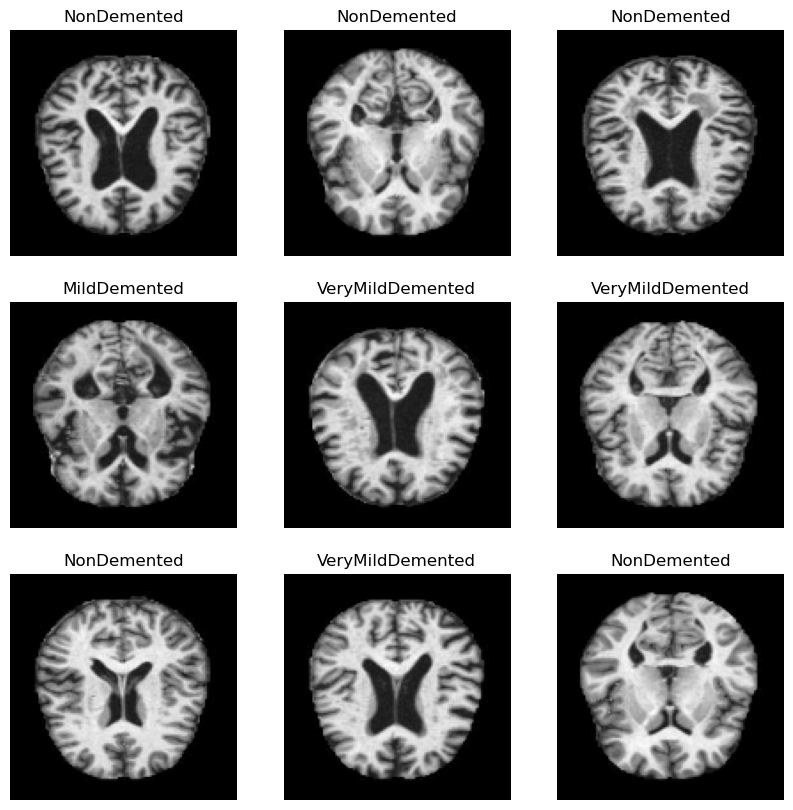

In [86]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

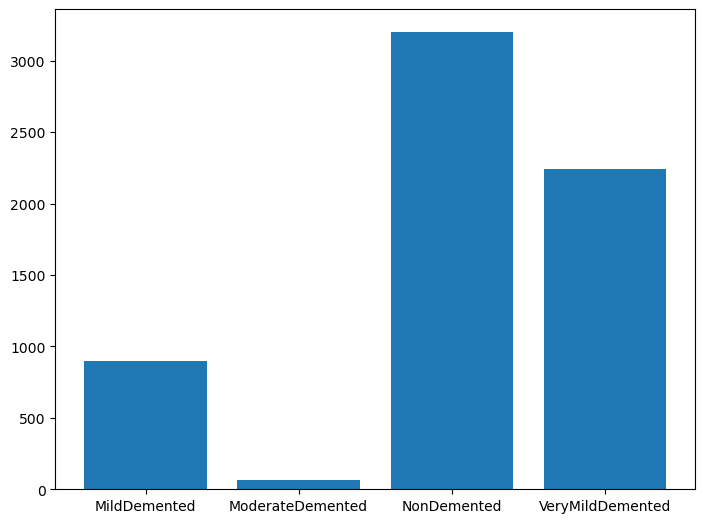

In [87]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

In [88]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow import keras

In [89]:
model1 = keras.models.Sequential()
model1.add(tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model1.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model1.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Dropout(0.20))

model1.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model1.add(keras.layers.Dense(64,"relu"))
model1.add(keras.layers.Dense(4,"softmax"))

C:\Users\Anjali Priyadarshi\anaconda3\envs\py3910\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [91]:
hist_new = model1.fit(train_ds,
                     validation_data=val_ds,
                     epochs=20,
                     batch_size=64,
                     verbose=1)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.4717 - loss: 1.5919 - val_accuracy: 0.5010 - val_loss: 0.9873
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.5412 - loss: 0.9434 - val_accuracy: 0.5979 - val_loss: 0.8736
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.5919 - loss: 0.8661 - val_accuracy: 0.6490 - val_loss: 0.7750
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.6579 - loss: 0.7583 - val_accuracy: 0.7188 - val_loss: 0.6446
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.7130 - loss: 0.6422 - val_accuracy: 0.6958 - val_loss: 0.6787
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.7756 - loss: 0.5032 - val_accuracy: 0.8396 - val_loss: 0.4074
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.8129 - loss: 0.4448 - val_accuracy: 0.8719 - val_loss: 0.3473
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8558 - loss: 0.3454 - val_acc

In [92]:
model1.save("my_model.h5")

In [93]:
loaded_model = keras.models.load_model("my_model.h5")

In [94]:
import numpy as np

num_correct = 0
num_total = 0

# Iterate over the test data and calculate the accuracy
for images, labels in test_ds.take(9):
    # Normalize the test images
    #images = images / 255.0
    
    # Predict the labels using the trained CNN model
    predictions = loaded_model.predict(images)
    
    # Calculate the batch accuracy
    batch_accuracy = np.mean(np.argmax(predictions, axis=1) == labels.numpy())
    
    # Update the variables for calculating the accuracy
    num_correct += np.sum(np.argmax(predictions, axis=1) == labels.numpy())
    num_total += len(labels)
    
    # Print the batch accuracy
    print('Batch accuracy:', batch_accuracy)
    
# Calculate the overall accuracy
overall_accuracy = num_correct / num_total

# Print the overall accuracy
print('Overall accuracy: %.3f' % (overall_accuracy*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Batch accuracy: 0.96875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Batch accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Batch accuracy: 0.9375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Batch accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Batch accuracy: 0.96875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Batch accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Batch accuracy: 0.96875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Batch accuracy: 0.90625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Batch accuracy: 0.96875
Overall accuracy: 96.875


In [95]:
num_correct = 0
num_samples = 0

for images, labels in test_ds:
    predictions = model1.predict(images)
    num_correct += np.sum(np.argmax(predictions, axis=1) == labels.numpy())
    num_samples += labels.shape[0]

print(f"✅ Final Test Accuracy: {num_correct / num_samples:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━

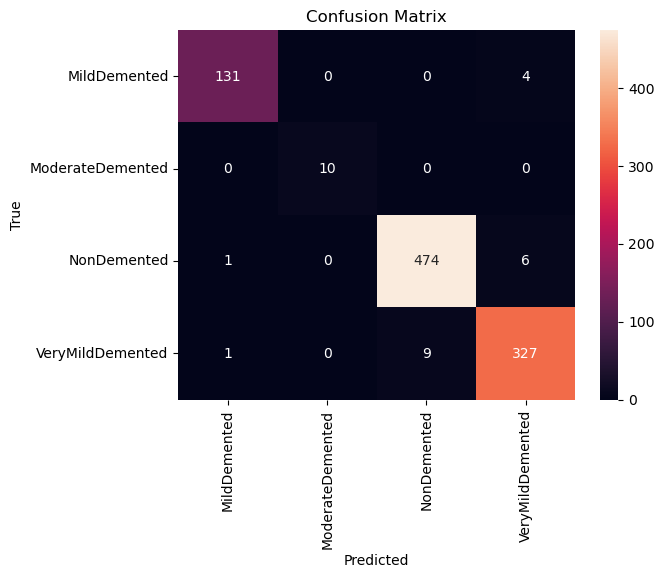

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    y_pred.extend(preds)
    y_true.extend(labels.numpy())

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [1]:
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("my_model.h5")  # Adjust name if needed

# Convert to TFLite for deployment/optimization (optional)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model_optimized.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model optimized and saved as model_optimized.tflite")


INFO:tensorflow:Assets written to: C:\Users\ANJALI~1\AppData\Local\Temp\tmpceypfa_t\assets


INFO:tensorflow:Assets written to: C:\Users\ANJALI~1\AppData\Local\Temp\tmpceypfa_t\assets


Saved artifact at 'C:\Users\ANJALI~1\AppData\Local\Temp\tmpceypfa_t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1366052009408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366052010640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366055455200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366055456080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366055638464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366055639344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366055884928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366055885808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366089713616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1366089713440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1

In [2]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

IMG_HEIGHT = 128
IMG_WIDTH = 128

# Adjust to match your training order
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

def predict_custom_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = img_to_array(image)
    # DO NOT rescale here if your model already does it via tf.keras.layers.Rescaling
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    predictions = model.predict(image)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Visualize
    plt.imshow(image[0].astype("uint8"))
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


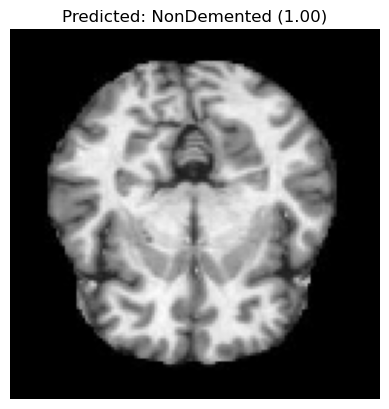

('NonDemented', np.float32(0.9996941))

In [3]:
predict_custom_image('C:/Users/Anjali Priyadarshi/Desktop/alz/Alzheimer_MRI_4_classes_dataset/NonDemented/1 (12).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


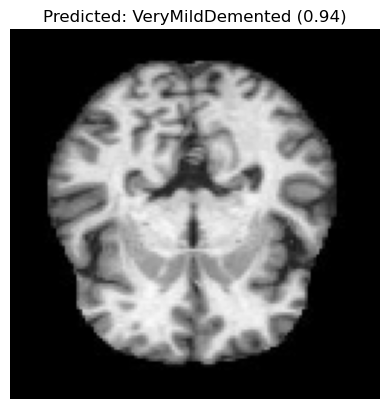

('VeryMildDemented', np.float32(0.93727934))

In [4]:
predict_custom_image("C:/Users/Anjali Priyadarshi/Desktop/alz/Alzheimer_MRI_4_classes_dataset/VeryMildDemented/1 (11).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


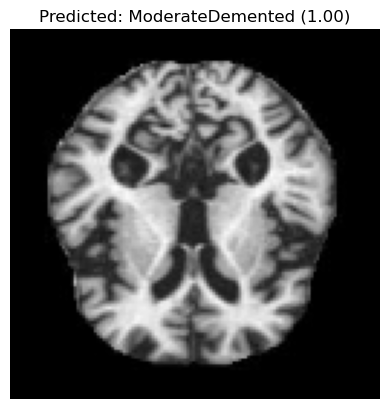

('ModerateDemented', np.float32(0.99931455))

In [5]:
predict_custom_image("C:/Users/Anjali Priyadarshi/Desktop/alz/Alzheimer_MRI_4_classes_dataset/ModerateDemented/6 (2).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


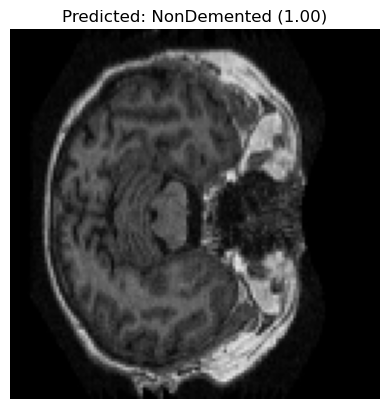

('NonDemented', np.float32(0.99796116))

In [6]:
predict_custom_image('C:/Users/Anjali Priyadarshi/Downloads/archive/train/Non Demented/OAS1_0001_MR1_mpr-1_106.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


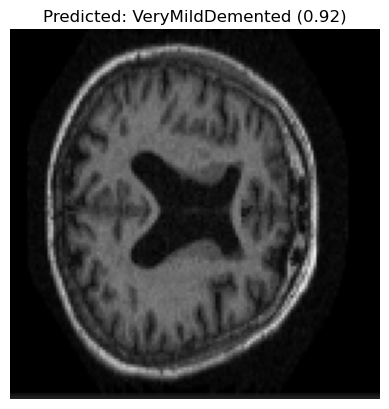

('VeryMildDemented', np.float32(0.9188329))

In [7]:
predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/2.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


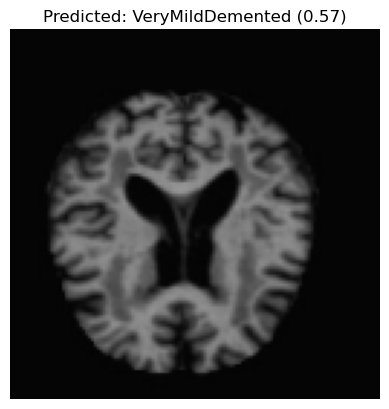

('VeryMildDemented', np.float32(0.57125354))

In [8]:
predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/abcd.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


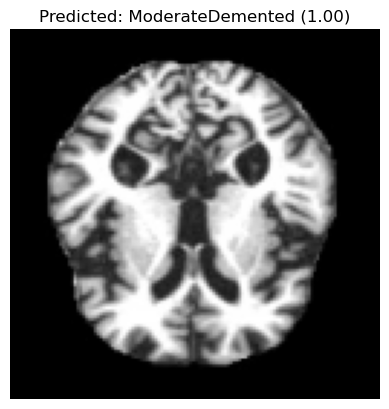

('ModerateDemented', np.float32(0.99969125))

In [9]:
predict_custom_image('C:/Users/Anjali Priyadarshi/Downloads/23.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


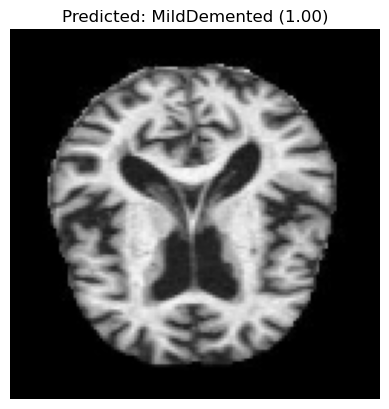

('MildDemented', np.float32(0.9998293))

In [10]:

predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/archive (2)/combined_images/MildDemented/mildDem434.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


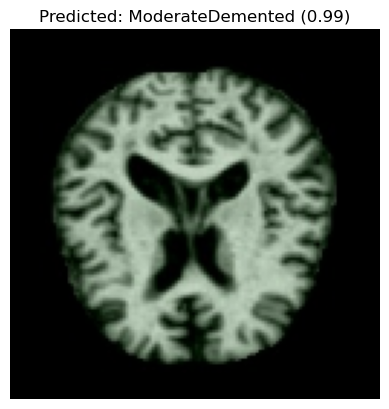

('ModerateDemented', np.float32(0.99401504))

In [11]:


predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/archive (2)/combined_images/ModerateDemented/a9595625-53fc-4d53-b651-dcd6a2dceb21.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


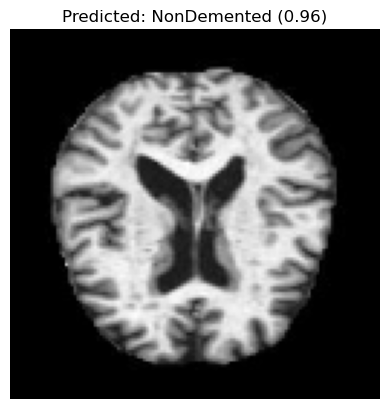

('NonDemented', np.float32(0.9636066))

In [12]:


predict_custom_image('C:/Users/Anjali Priyadarshi/Downloads/archive (2)/combined_images/NonDemented/nonDem2098.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


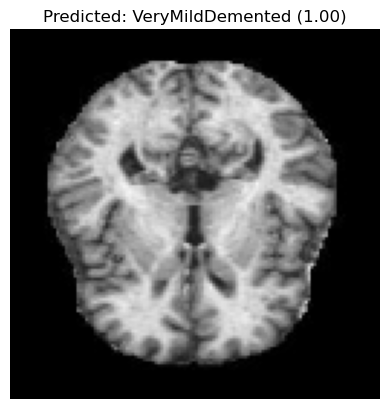

('VeryMildDemented', np.float32(0.9955765))

In [13]:
predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/archive (2)/combined_images/VeryMildDemented/verymildDem143.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


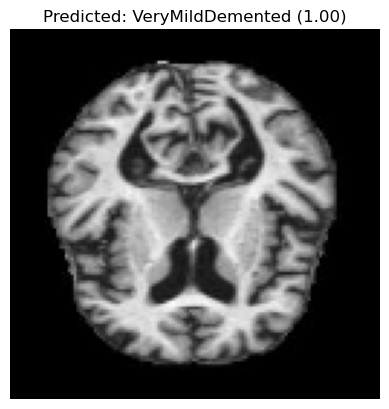

('VeryMildDemented', np.float32(0.99999344))

In [17]:

predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/archive (2)/combined_images/VeryMildDemented/verymildDem590.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


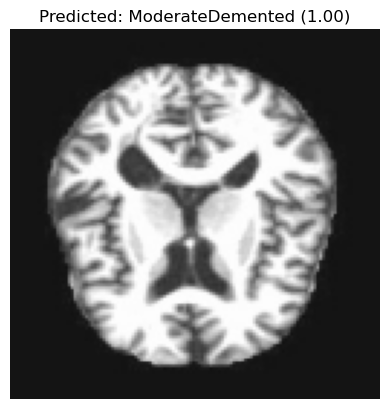

('ModerateDemented', np.float32(0.99710125))

In [18]:

predict_custom_image("C:/Users/Anjali Priyadarshi/Downloads/archive (2)/combined_images/ModerateDemented/fc01de1f-55ba-4ba2-9b63-4c0d20877632.jpg")